In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Bidirectional, LSTM, SimpleRNN,GRU,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [45]:
# Load the dataset
df = pd.read_csv('..//..//dataset//final_dataset.csv')  # Replace with your dataset path
# df=pd.read_excel('..//..//dataset//Dataset_IoV.xlsx')

# Separating features and target
X = df[['Number of Lanes', 'Status of driver', 'Nature of environment', 'Velocity of vehicle', 'Distance between vehicles', 'Breaking capability']]
y = df['Collussion']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# X_scaled = X

# Reshape input to be 3D [samples, timesteps, features] for LSTM
X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [46]:
print(X_train.shape, y_train.shape,X_scaled.shape)

(320000, 1, 6) (320000,) (400000, 1, 6)


# Model

In [47]:
def build_deep_rnn_bi_lstm():
    model = Sequential()
    
    # Add multiple SimpleRNN layers for Deep RNN
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))


    model.add(SimpleRNN(units=50,activation='relu', return_sequences=True))
    # model.add(Dropout(0.8))

    model.add(Bidirectional(LSTM(units=50, activation='relu',return_sequences=True)))
    # model.add(Dropout(0.8))

    model.add(Bidirectional(LSTM(units=50,activation='relu', return_sequences=True)))

    # Output layer
    model.add(Dense(units=1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['mse', 'mae'])

    return model


In [48]:

# Instantiate and train the model
model = build_deep_rnn_bi_lstm()
import time
start_time=time.time()
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=512,
    validation_data=(X_test, y_test),
    verbose=1
)
end_time = time.time()

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - loss: 0.1661 - mae: 0.1242 - mse: 0.0560 - val_loss: 1.8926e-05 - val_mae: 1.8838e-05 - val_mse: 5.0032e-08
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - loss: 2.1082e-05 - mae: 1.5508e-05 - mse: 7.4592e-07 - val_loss: 6.2844e-06 - val_mae: 6.2169e-06 - val_mse: 1.6336e-09
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - loss: 8.4919e-06 - mae: 7.7133e-06 - mse: 8.2605e-07 - val_loss: 2.3212e-06 - val_mae: 2.2495e-06 - val_mse: 1.7775e-10
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 1.8987e-06 - mae: 1.8304e-06 - mse: 1.2978e-10 - val_loss: 1.1034e-06 - val_mae: 1.0349e-06 - val_mse: 6.9182e-11
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 9.8088e-07 - mae: 9.1220e-07 - mse: 6.3495e-11 - val_loss: 6.7947e-07 - val_mae: 6.0816e-07 - val_mse: 3.8332e-11
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - loss: 6.0703e-07 - mae: 5.3860e-07 - mse: 3.0344e-11 - val_loss: 4.5273e-07 - 

In [49]:

from sklearn.metrics import mean_squared_error
import numpy as np

# Make predictions
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.16f}')

# Calculate RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.16f}')

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


ValueError: Found array with dim 3. None expected <= 2.

In [54]:
print(history.history.keys())
# removing the first 10 epochs for better visualization
history.history['loss'] = history.history['loss'][1:]
history.history['val_loss'] = history.history['val_loss'][1:]
history.history['mae'] = history.history['mae'][1:]
history.history['val_mae'] = history.history['val_mae'][1:]
history.history['mse'] = history.history['mse'][1:]
history.history['val_mse'] = history.history['val_mse'][1:]


dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


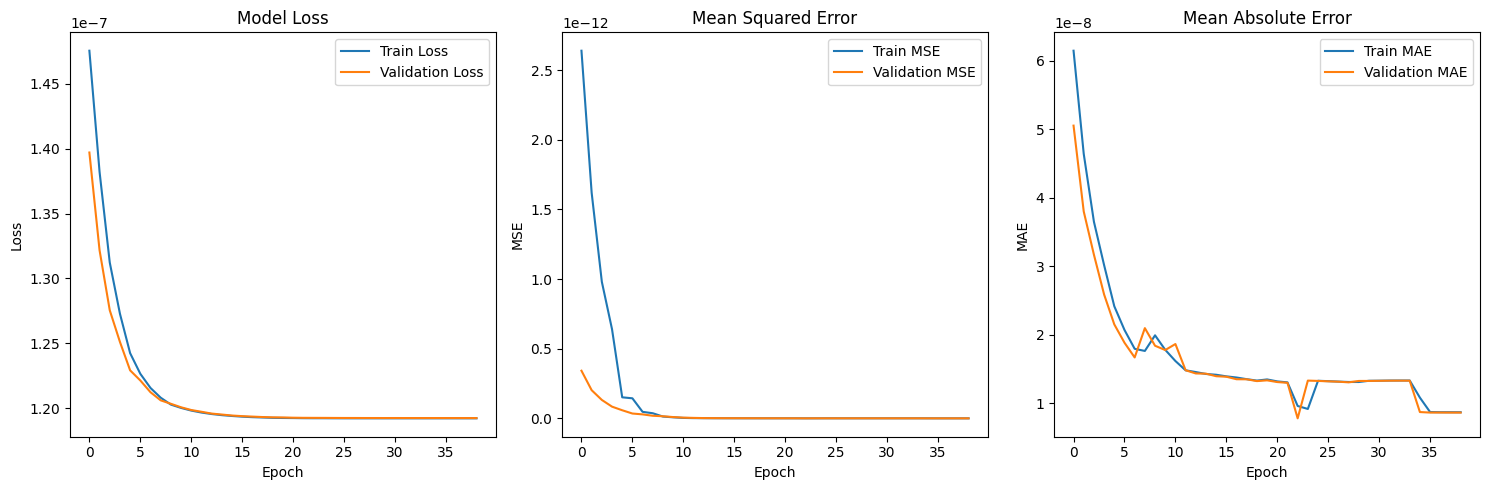

In [55]:
import matplotlib.pyplot as plt

# Visualizing the loss, MSE, and MAE
plt.figure(figsize=(15, 5))

# Loss plot
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# MSE plot
plt.subplot(1, 3, 2)
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# MAE plot
plt.subplot(1, 3, 3)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [ ]:
#saving the model
